# HROCH Dry Run

In [1]:
# Install libraries
!pip install -U HROCH

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 5.9 MB/s eta 0:00:00


In [2]:
# Call libraries
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from HROCH import SymbolicRegressor
import time

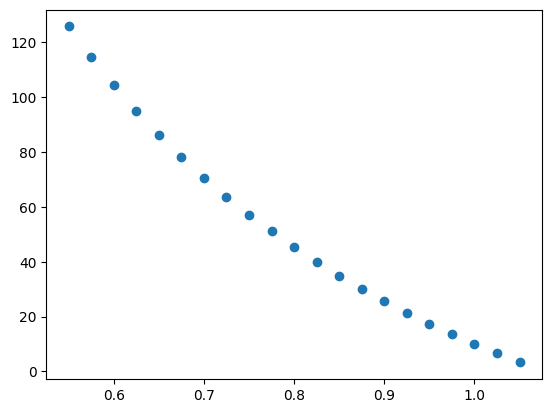

In [3]:
# Build Toy Dataset
x=np.arange(start=0.55,stop=1.075,step=0.025)
y=141.5/x-131.5
plt.plot(x,y,marker="o",linestyle="None")
plt.show()

In [4]:
t0 = time.time()
myMod=SymbolicRegressor(verbose=1)
myMod.fit(x.reshape(-1, 1),y)
y_pred=myMod.predict(x.reshape(-1, 1))
print("time to fit: ",time.time() - t0, 'seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


time to fit:  5.031866550445557 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


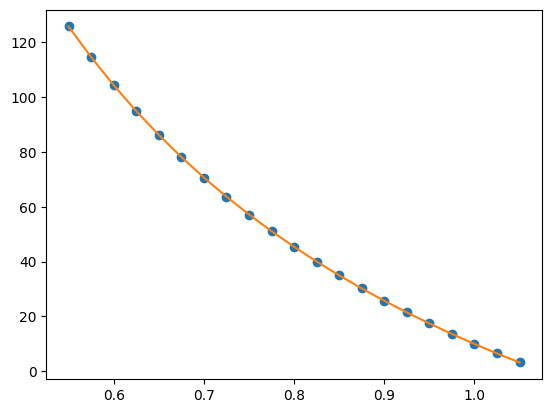

In [5]:
plt.plot(x,y,marker="o",linestyle="None")
plt.plot(x,y_pred)
plt.show()

In [6]:
def get_eq(X : pd.DataFrame, expr : str):
    model_str = str(sym.parse_expr(expr))
    mapping = {'x'+str(i+1): k for i, k in enumerate(X.columns)}
    new_model = model_str
    for k, v in reversed(mapping.items()):
        new_model = new_model.replace(k, v)

    return new_model

# Create a dummy DataFrame from the x variable for the function call
x_df = pd.DataFrame(x, columns=['x'])
myEq=get_eq(x_df, myMod.sexpr_)
print(myEq)

129.949688846035*(-x0*(0.00769528583623469*x0**2 + x0) + 1.084445588290691*x0)/x0**2


In [7]:
myEq = sym.sympify(myEq)
myEq

(-129.949688846035*x0*(0.00769528583623469*x0**2 + x0) + 140.9233667688307*x0)/x0**2

In [8]:
sym.simplify(myEq)

-0.999999999999998*x0 - 129.949688846035 + 140.9233667688307/x0